# OUTLIER

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\loan_data_618x13.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            618 non-null    object
 1   Gender             618 non-null    object
 2   Married            618 non-null    object
 3   Dependents         618 non-null    object
 4   Education          618 non-null    object
 5   Self_Employed      618 non-null    object
 6   ApplicantIncome    618 non-null    int64 
 7   CoapplicantIncome  618 non-null    int64 
 8   LoanAmount         618 non-null    int64 
 9   Loan_Amount_Term   618 non-null    int64 
 10  Credit_History     618 non-null    int64 
 11  Property_Area      618 non-null    object
 12  Loan_Status        618 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.9+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,10529.509709,7413.249191,366.427184,223.980583,0.485437
std,5363.503184,4231.488026,190.659757,88.651045,0.500193
min,1010.000000,40.000000,51.000000,120.000000,0.000000
25%,6209.250000,4058.500000,201.000000,120.000000,0.000000
50%,10404.000000,7150.500000,368.500000,240.000000,0.000000
75%,15042.250000,10828.500000,534.250000,240.000000,1.000000
max,19992.000000,14944.000000,699.000000,360.000000,1.000000


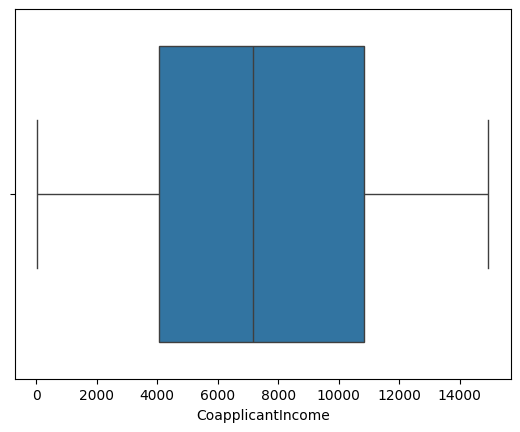

In [6]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

C:\Users\Shaik.AbdulRazak\AppData\Local\Temp\ipykernel_13952\2074043954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome"])


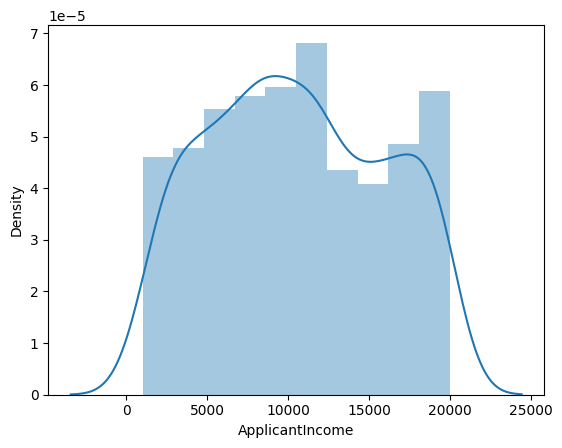

In [7]:
sns.distplot(data["ApplicantIncome"])
plt.show()

# Outlier Removal Using IQR

In [8]:
# we remove data of outlier by using IQR 
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,10529.509709,7413.249191,366.427184,223.980583,0.485437
std,5363.503184,4231.488026,190.659757,88.651045,0.500193
min,1010.000000,40.000000,51.000000,120.000000,0.000000
25%,6209.250000,4058.500000,201.000000,120.000000,0.000000
50%,10404.000000,7150.500000,368.500000,240.000000,0.000000
75%,15042.250000,10828.500000,534.250000,240.000000,1.000000
max,19992.000000,14944.000000,699.000000,360.000000,1.000000


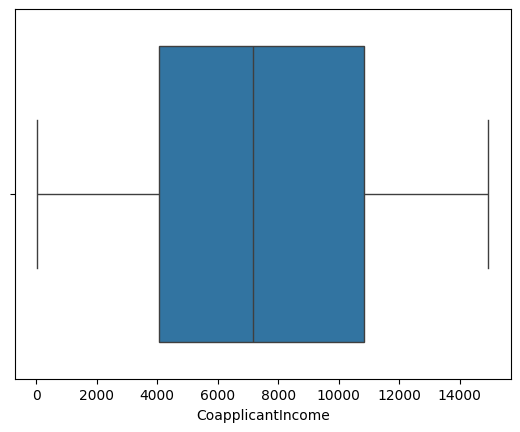

In [9]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

In [10]:
data.shape

(618, 13)

In [11]:
# It covert into percentage
q1=data["CoapplicantIncome"].quantile(0.25)
q2=data["CoapplicantIncome"].quantile(0.75)
q1
q2

np.float64(10828.5)

In [12]:
# to remove the outlier
IQR=q1-q2

In [13]:
min_range=q1-(1.5*IQR)
max_range=q2+(1.5*IQR)
min_range
max_range

np.float64(673.5)

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N


In [15]:
new_data=data[data["CoapplicantIncome"]<=max_range]
data.shape

(618, 13)

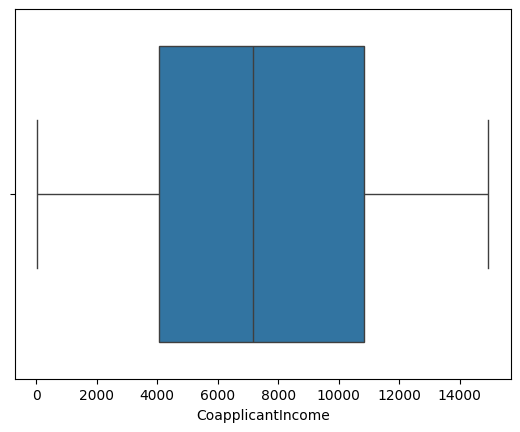

In [16]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

# Outlier Removal Using (Z SCORE)

In [17]:
data1=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\loan_data_618x13.csv")
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N


In [18]:
data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,10529.509709,7413.249191,366.427184,223.980583,0.485437
std,5363.503184,4231.488026,190.659757,88.651045,0.500193
min,1010.000000,40.000000,51.000000,120.000000,0.000000
25%,6209.250000,4058.500000,201.000000,120.000000,0.000000
50%,10404.000000,7150.500000,368.500000,240.000000,0.000000
75%,15042.250000,10828.500000,534.250000,240.000000,1.000000
max,19992.000000,14944.000000,699.000000,360.000000,1.000000


<Axes: ylabel='CoapplicantIncome'>

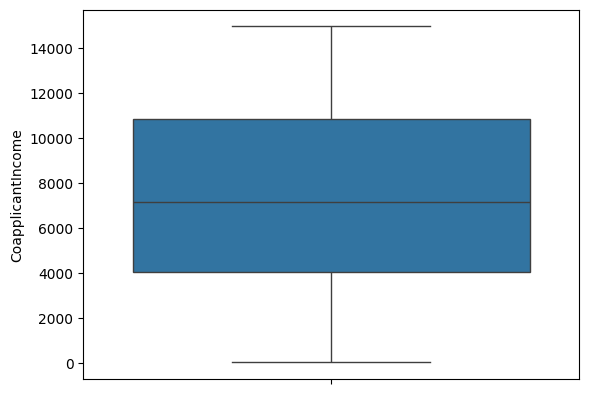

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data1["CoapplicantIncome"])

In [21]:
min_range=data1["ApplicantIncome"].mean()-(3*data1["CoapplicantIncome"].std())
max_range=data1["ApplicantIncome"].mean()+(3*data1["CoapplicantIncome"].std())

In [22]:
min_range

np.float64(-2164.9543678687187)

In [23]:
max_range

np.float64(23223.973785344446)

In [24]:
data1[data1["CoapplicantIncome"]<max_range]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP001757,Female,No,0,Graduate,No,17683,10778,493,240,1,Rural,N
614,LP001342,Female,No,0,Not Graduate,Yes,1917,4780,95,120,0,Rural,N
615,LP001645,Female,Yes,2,Graduate,No,18808,2861,485,120,1,Semiurban,Y
616,LP001763,Female,Yes,1,Graduate,No,16917,5294,488,180,0,Rural,N


<Axes: xlabel='CoapplicantIncome'>

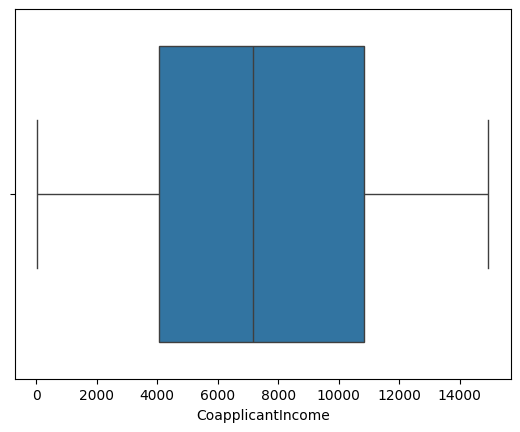

In [25]:
import seaborn as sns
new_data1 = data1[data1["CoapplicantIncome"] < max_range]
sns.boxplot(x="CoapplicantIncome", data=new_data1)

In [26]:
# by using z-score method we can remove the outlier 
z_score=data1["CoapplicantIncome"]-data1["CoapplicantIncome"].mean()/(data1["CoapplicantIncome"].std())
data1["z_score"] = z_score
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y,3790.248075
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N,10592.248075
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y,9246.248075
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N,10481.248075
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N,858.248075


In [27]:
data1[data1["z_score"]<3]
data1[data1["z_score"]>-3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y,3790.248075
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N,10592.248075
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y,9246.248075
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N,10481.248075
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N,858.248075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP001757,Female,No,0,Graduate,No,17683,10778,493,240,1,Rural,N,10776.248075
614,LP001342,Female,No,0,Not Graduate,Yes,1917,4780,95,120,0,Rural,N,4778.248075
615,LP001645,Female,Yes,2,Graduate,No,18808,2861,485,120,1,Semiurban,Y,2859.248075
616,LP001763,Female,Yes,1,Graduate,No,16917,5294,488,180,0,Rural,N,5292.248075


In [28]:
data1
new_data1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001391,Male,Yes,2,Not Graduate,Yes,19593,3792,589,180,1,Rural,Y
1,LP001401,Male,Yes,1,Not Graduate,No,3286,10594,520,120,0,Semiurban,N
2,LP001320,Male,Yes,3+,Graduate,No,7842,9248,540,240,0,Urban,Y
3,LP001031,Male,No,0,Not Graduate,No,17461,10483,506,360,1,Rural,N
4,LP001600,Male,No,2,Not Graduate,No,8969,860,227,240,1,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP001757,Female,No,0,Graduate,No,17683,10778,493,240,1,Rural,N
614,LP001342,Female,No,0,Not Graduate,Yes,1917,4780,95,120,0,Rural,N
615,LP001645,Female,Yes,2,Graduate,No,18808,2861,485,120,1,Semiurban,Y
616,LP001763,Female,Yes,1,Graduate,No,16917,5294,488,180,0,Rural,N
